In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('unemployment_data.csv')

# Display the first few rows of the dataset
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [3]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv('unemployment_data.csv')

# Step 2: Check the column names and the first few rows of the dataset
print("Column names:", data.columns)  # Display the column names
print(data.head())  # Display the first few rows of the dataset

# Step 3: Remove leading/trailing spaces from column names if necessary
data.columns = data.columns.str.strip()

# Check again the cleaned column names
print("Cleaned Column names:", data.columns)

# Step 4: Strip whitespace from 'Date' column entries
data['Date'] = data['Date'].str.strip()  # Strip whitespace from date entries

# Step 5: Convert 'Date' to datetime format, checking if 'Date' exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
else:
    print("Error: 'Date' column not found!")

# Step 6: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Step 7: Fill or drop missing values as needed
data.dropna(inplace=True)  # Example of dropping missing values

# Print the data types to verify
print("Data types after conversion:")
print(data.dtypes)


Column names: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.1

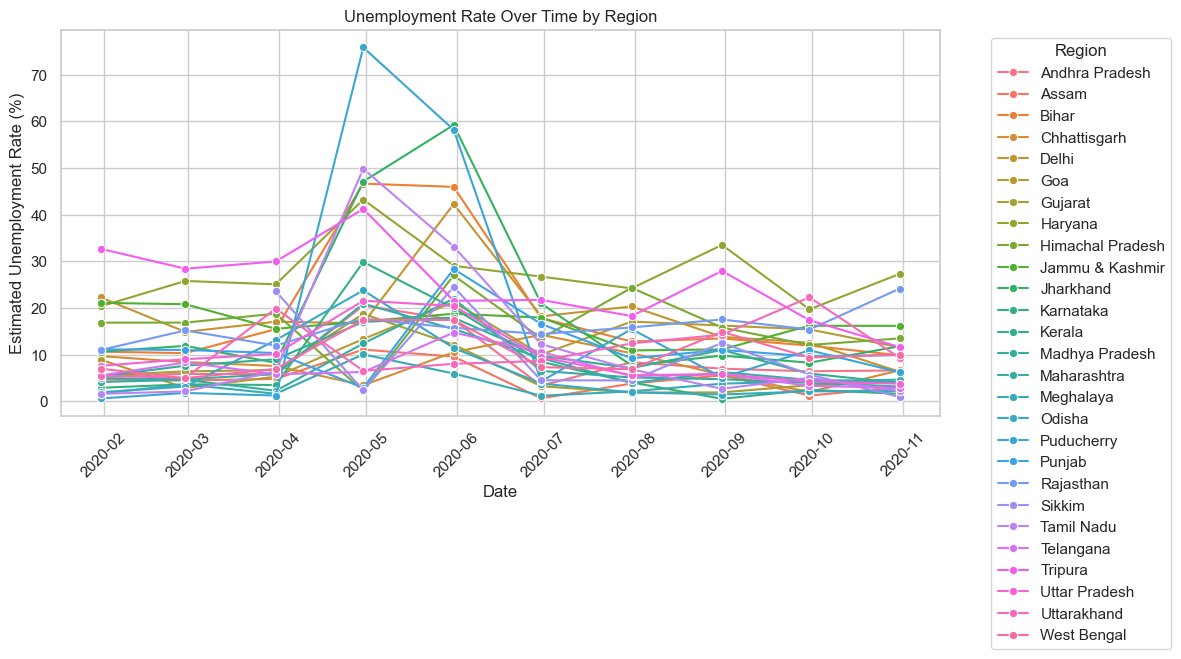

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style='whitegrid')

# Plotting the unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


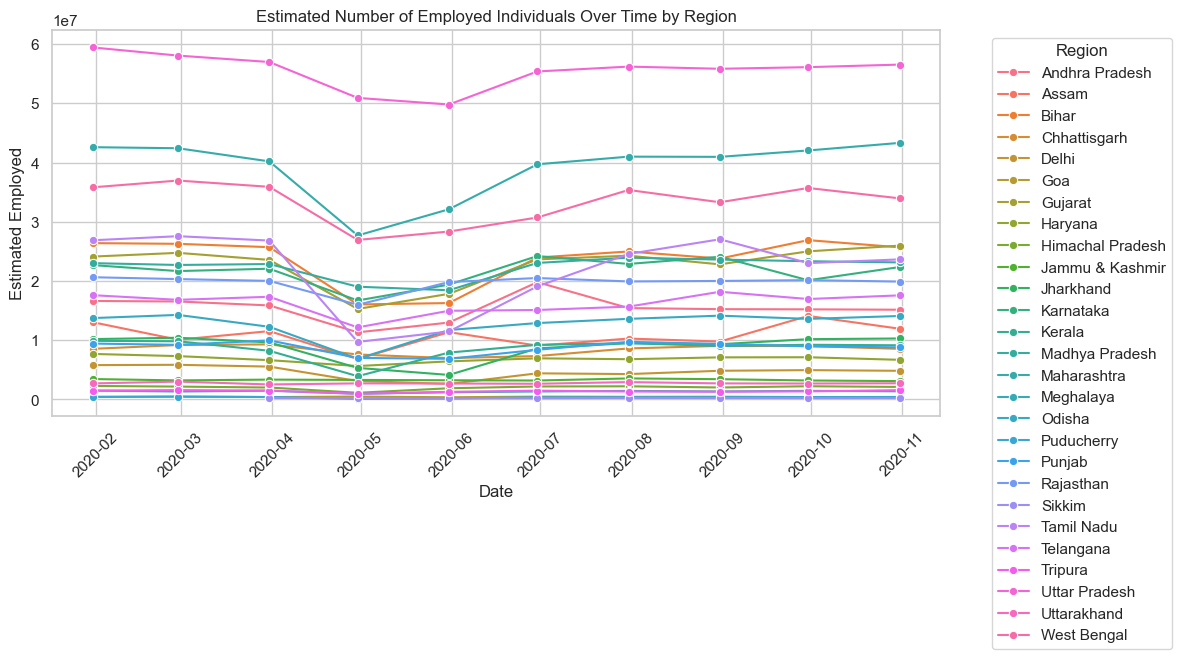

In [7]:
# Plotting the estimated number of employed individuals over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Estimated Employed', hue='Region', marker='o')
plt.title('Estimated Number of Employed Individuals Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


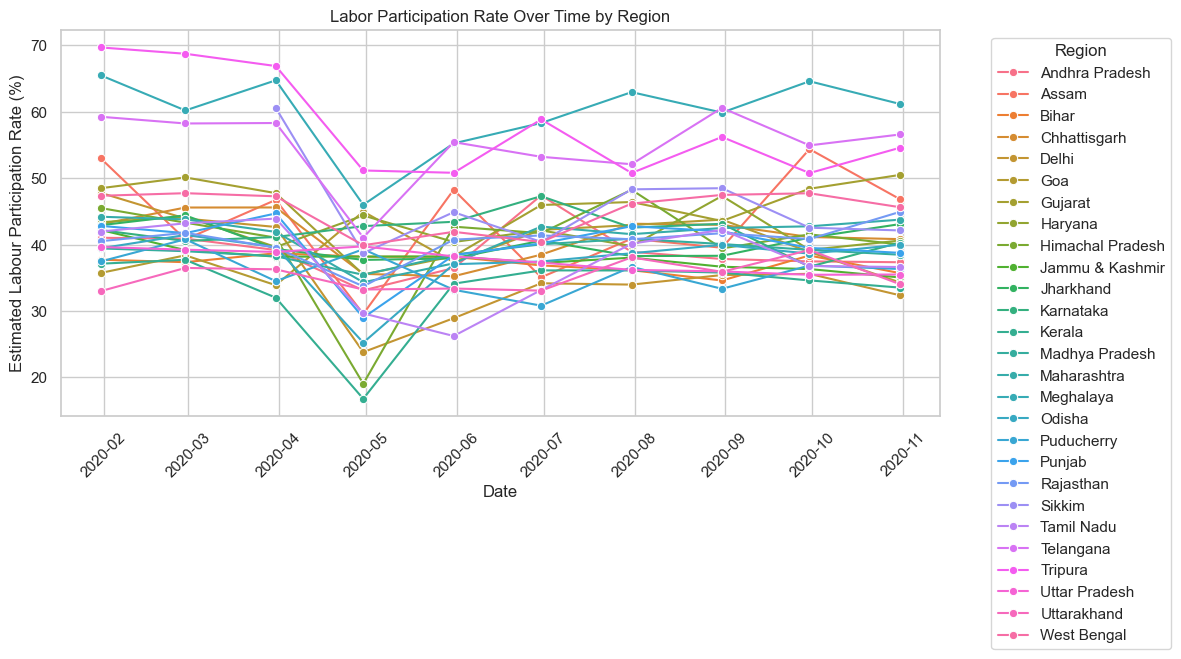

In [9]:
# Plotting the labor participation rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate (%)', hue='Region', marker='o')
plt.title('Labor Participation Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# Descriptive statistics
descriptive_stats = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].describe()
print(descriptive_stats)


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)  
count                               267.000000  
mean                                 41.681573  
std                                   7.845419  
min                                  16.770000  
25%                                  37.265000  
50%                                  40.390000  
75%                                  44.055000  
max                                  69.690000  


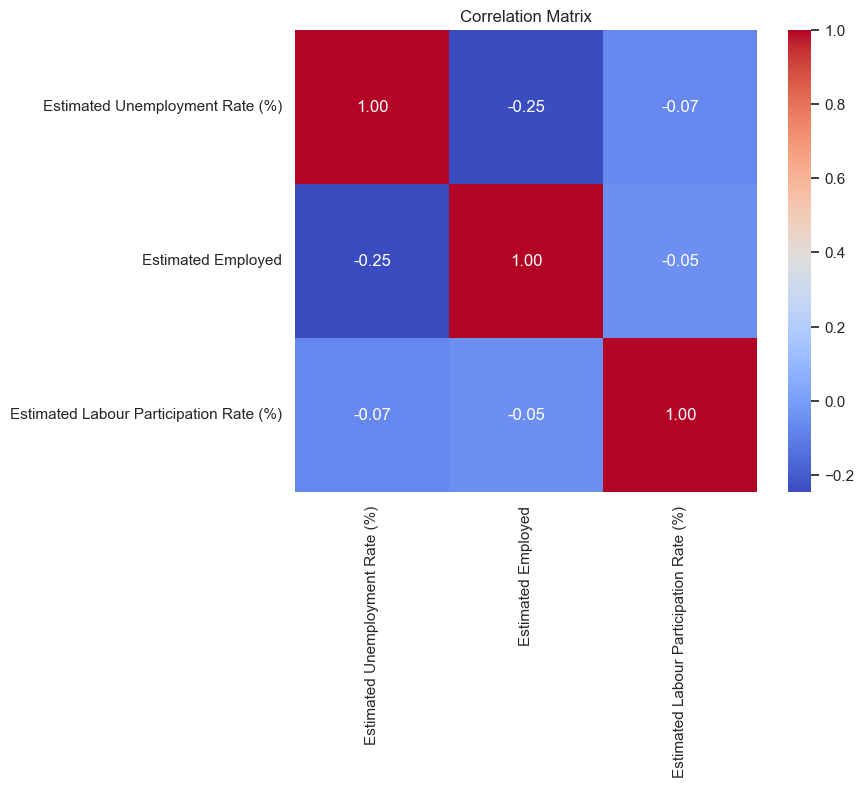

In [13]:
# Correlation matrix
correlation_matrix = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Find the maximum unemployment rate for each region
max_unemployment = data.loc[data['Estimated Unemployment Rate (%)'].idxmax()]
print("Region with highest unemployment rate:")
print(max_unemployment)


Region with highest unemployment rate:
Region                                              Puducherry
Date                                       2020-04-30 00:00:00
Frequency                                                    M
Estimated Unemployment Rate (%)                          75.85
Estimated Employed                                      117542
Estimated Labour Participation Rate (%)                   39.3
Region.1                                                 South
longitude                                              11.9416
latitude                                               79.8083
Name: 172, dtype: object


In [17]:
# Calculate the average unemployment rate before and after March 2020
before_covid = data[data['Date'] < '2020-03-01']['Estimated Unemployment Rate (%)'].mean()
after_covid = data[data['Date'] >= '2020-03-01']['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate Before COVID-19: {before_covid:.2f}%")
print(f"Average Unemployment Rate After COVID-19: {after_covid:.2f}%")


Average Unemployment Rate Before COVID-19: 9.23%
Average Unemployment Rate After COVID-19: 12.96%


In [19]:
# Summary of findings
print("----- Summary of Findings -----")
print(f"1. Overall Descriptive Statistics:\n{descriptive_stats}\n")
print(f"2. Correlation between Variables:\n{correlation_matrix}\n")

# Identify and summarize the region with the highest unemployment rate
print("3. Region with Highest Unemployment Rate:")
print(max_unemployment[['Region', 'Date', 'Estimated Unemployment Rate (%)']])

# Calculate the average unemployment rate before and after COVID-19
print(f"\n4. Average Unemployment Rate Before COVID-19: {before_covid:.2f}%")
print(f"   Average Unemployment Rate After COVID-19: {after_covid:.2f}%")


----- Summary of Findings -----
1. Overall Descriptive Statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)  
count                               267.000000  
mean                                 41.681573  
std                                   7.845419  
min                                  16.770000  
25%                                  37.265000  
50%                                  40.390000  
75%                            

In [21]:
# Save visualizations to files
def save_visualization(plot_func, filename):
    plt.figure(figsize=(12, 6))
    plot_func()
    plt.savefig(filename)
    plt.close()

# Save unemployment rate plot
save_visualization(lambda: sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o'), 'unemployment_rate_over_time.png')

# Save employed individuals plot
save_visualization(lambda: sns.lineplot(data=data, x='Date', y='Estimated Employed', hue='Region', marker='o'), 'estimated_employed_over_time.png')

# Save labor participation rate plot
save_visualization(lambda: sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate (%)', hue='Region', marker='o'), 'labor_participation_rate_over_time.png')

print("Visualizations saved to PNG files.")


Visualizations saved to PNG files.


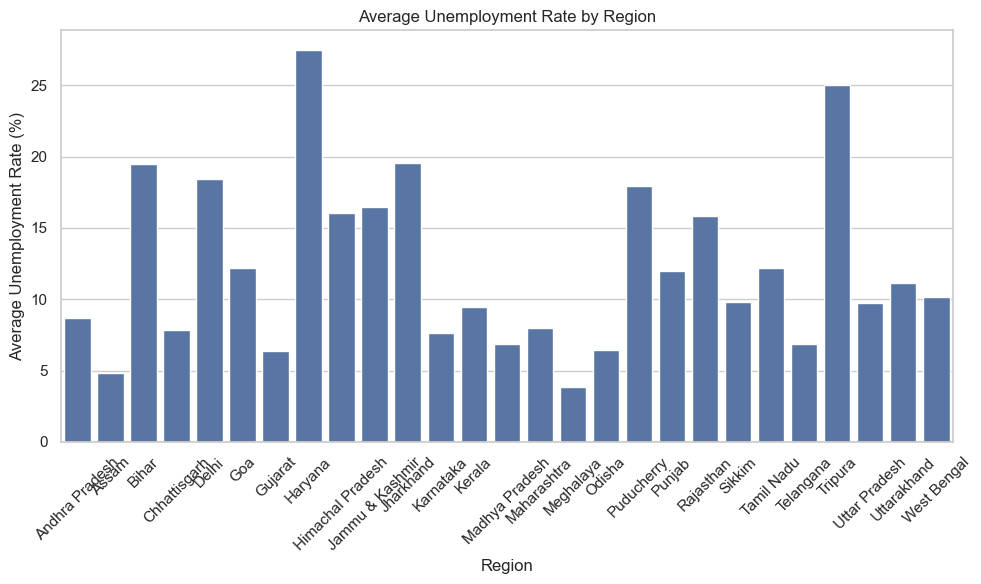

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names: strip spaces and replace spaces with underscores (if not already done)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Group by region to calculate average unemployment rate
region_avg_unemployment = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# Plot unemployment rate by region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=region_avg_unemployment)
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [37]:
import pandas as pd
import folium

# Load the dataset (adjust the file path as needed)
data = pd.read_csv('unemployment_data.csv')

# Clean column names by removing leading/trailing spaces
data.columns = data.columns.str.strip()

# Strip whitespace from 'Date' column entries
data['Date'] = data['Date'].str.strip()

# Convert 'Date' to datetime format, checking if 'Date' exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
else:
    print("Error: 'Date' column not found!")

# Drop rows with missing values
data.dropna(inplace=True)

# Extract the latest unemployment data for each region
latest_data = data.loc[data.groupby('Region')['Date'].idxmax()]

# Create a base map centered around the average latitude and longitude
m = folium.Map(location=[latest_data['longitude'].mean(), latest_data['latitude'].mean()], zoom_start=2)

# Add markers for each region
for _, row in latest_data.iterrows():
    folium.CircleMarker(
        location=(row['longitude'], row['latitude']),
        radius=row['Estimated Unemployment Rate (%)'] / 2,  # Adjust radius for visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['Region']}: {row['Estimated Unemployment Rate (%)']}%",
    ).add_to(m)

# Save the map to an HTML file
m.save('unemployment_map.html')
print("Map saved as 'unemployment_map.html'.")


Map saved as 'unemployment_map.html'.
